<a href="https://colab.research.google.com/github/lowrense/PCM---recyclability/blob/main/clean_the_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
Cleaned dataset saved: 8244 rows (from 10000 total)


<ipython-input-1-a8b5001e0b0e>:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


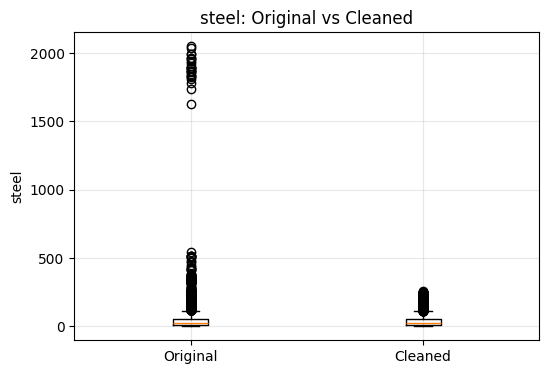

<ipython-input-1-a8b5001e0b0e>:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


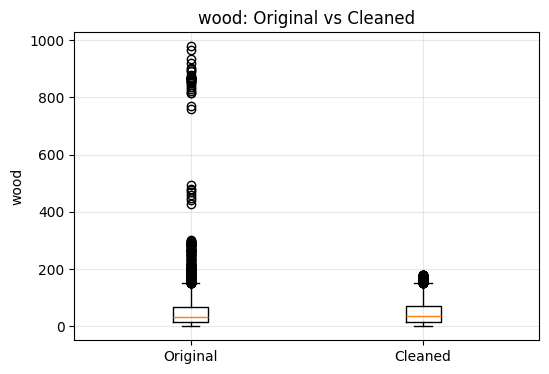

<ipython-input-1-a8b5001e0b0e>:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


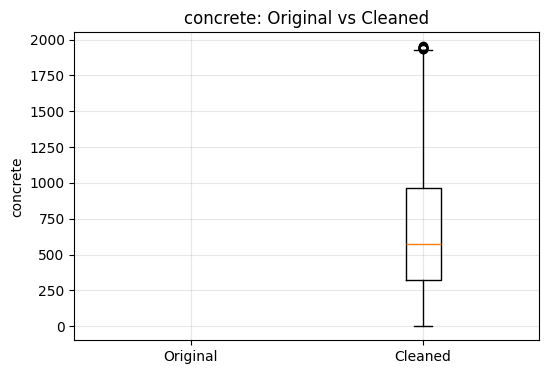

<ipython-input-1-a8b5001e0b0e>:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


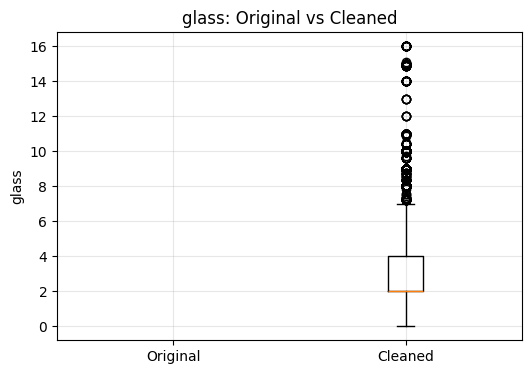

<ipython-input-1-a8b5001e0b0e>:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


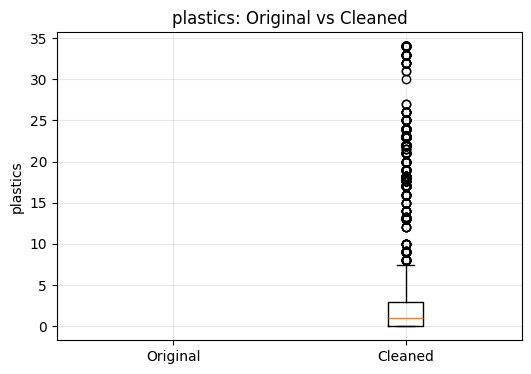

In [ ]:
# 0) Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 1) Load the dataset from Drive
import pandas as pd
import matplotlib.pyplot as plt

# adjust these paths to your Drive layout:
file_path   = '/content/drive/MyDrive/ProjectManagement/buildings_10000.xlsx'
output_path = '/content/drive/MyDrive/ProjectManagement/buildings_10000_cleaned_k1.xlsx'

df = pd.read_excel(
    file_path,
    na_values=["NA", "unspecified", "Unspecified"]
)

# Drop any “Unnamed” columns
df = df.loc[:, ~df.columns.str.lower().str.contains("unnamed")]

# 2) Identify feature vs. target columns
feature_cols = ['country', 'no_floors', 'occupation', 'urban_rural']
target_cols  = [c for c in df.columns if c not in feature_cols]

# 3) Compute per-column mean and std for targets
y = df[target_cols].astype(float)
means = y.mean()
stds  = y.std()

# 4) Filter rows: keep only those with all targets within ±2σ
mask = ((y - means).abs() <= 2 * stds).all(axis=1)
df_clean = df.loc[mask].reset_index(drop=True)

# 5) Save the cleaned DataFrame back to Drive
df_clean.to_excel(output_path, index=False)
print(f"Cleaned dataset saved: {len(df_clean)} rows (from {len(df)} total)")

# 6) Plot boxplots for each target: Original vs Cleaned
for col in target_cols:
    plt.figure(figsize=(6,4))
    plt.boxplot(
        [df[col].astype(float), df_clean[col].astype(float)],
        labels=['Original', 'Cleaned']
    )
    plt.title(f"{col}: Original vs Cleaned")
    plt.ylabel(col)
    plt.grid(alpha=0.3)
    plt.show()


new data cleaning using IQR filter; should remove outliers especially in concrete

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
steel       : dropped 1032 rows outside [-32.00, 94.00]
wood        : dropped 537 rows outside [-41.00, 127.00]
concrete    : dropped 493 rows outside [-373.65, 1743.30]
glass       : dropped 820 rows outside [-1.00, 8.00]
plastics    : dropped 1499 rows outside [-3.00, 6.00]

Cleaned dataset saved: 5619 rows (from 10000 total)


<ipython-input-2-fde9f1b9a0d3>:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


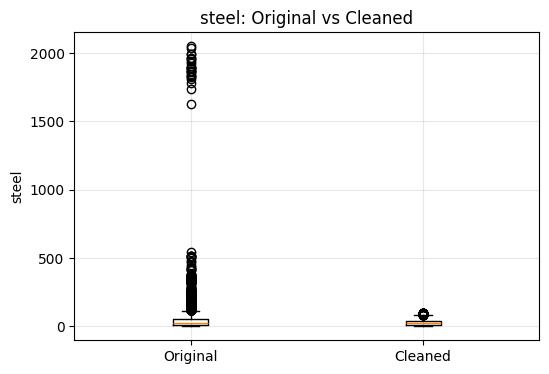

<ipython-input-2-fde9f1b9a0d3>:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


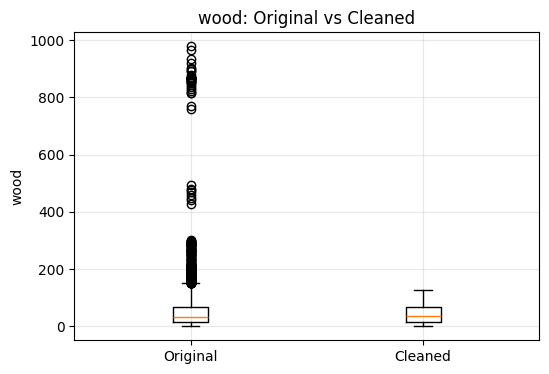

<ipython-input-2-fde9f1b9a0d3>:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


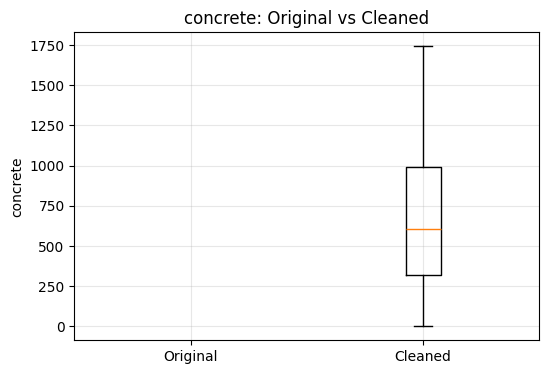

<ipython-input-2-fde9f1b9a0d3>:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


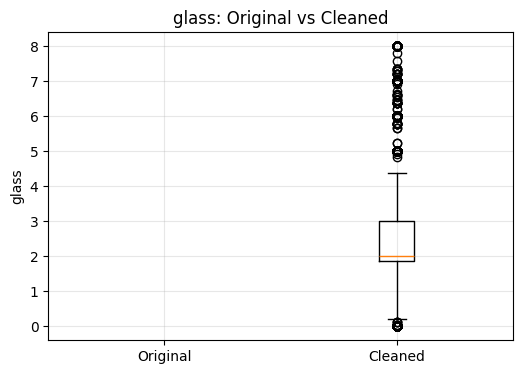

<ipython-input-2-fde9f1b9a0d3>:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


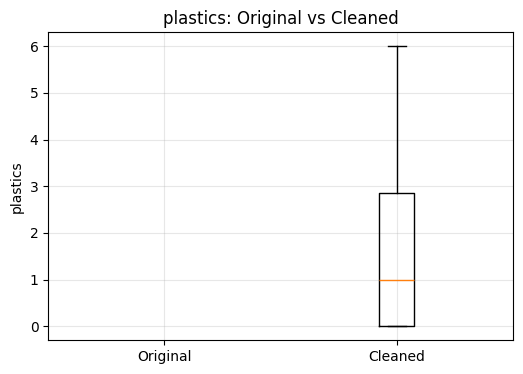

In [ ]:
# 0) Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 1) Load the dataset from Drive
import pandas as pd
import matplotlib.pyplot as plt

# adjust these paths to your Drive layout:
file_path   = '/content/drive/MyDrive/ProjectManagement/buildings_10000.xlsx'
output_path = '/content/drive/MyDrive/ProjectManagement/buildings_10000_cleaned_k1.xlsx'

df = pd.read_excel(
    file_path,
    na_values=["NA", "unspecified", "Unspecified"]
)

# Drop any “Unnamed” columns
df = df.loc[:, ~df.columns.str.lower().str.contains("unnamed")]

# 2) Identify feature vs. target columns
feature_cols = ['country', 'no_floors', 'occupation', 'urban_rural']
target_cols  = [c for c in df.columns if c not in feature_cols]

# 3) IQR-based outlier removal
k = 1  # tweak this threshold as needed
df_clean = df.copy()

for col in target_cols:
    # compute Q1, Q3, and IQR on the current (shrinking) dataset
    q1   = df_clean[col].quantile(0.25)
    q3   = df_clean[col].quantile(0.75)
    iqr  = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr

    # keep only rows within [lower, upper]
    before = len(df_clean)
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    after = len(df_clean)
    print(f"{col:12s}: dropped {before-after} rows outside [{lower:.2f}, {upper:.2f}]")

# reset index
df_clean = df_clean.reset_index(drop=True)

# 4) Save the cleaned DataFrame back to Drive
df_clean.to_excel(output_path, index=False)
print(f"\nCleaned dataset saved: {len(df_clean)} rows (from {len(df)} total)")

# 5) Plot boxplots for each target: Original vs Cleaned
for col in target_cols:
    plt.figure(figsize=(6,4))
    plt.boxplot(
        [df[col].astype(float), df_clean[col].astype(float)],
        labels=['Original', 'Cleaned']
    )
    plt.title(f"{col}: Original vs Cleaned")
    plt.ylabel(col)
    plt.grid(alpha=0.3)
    plt.show()


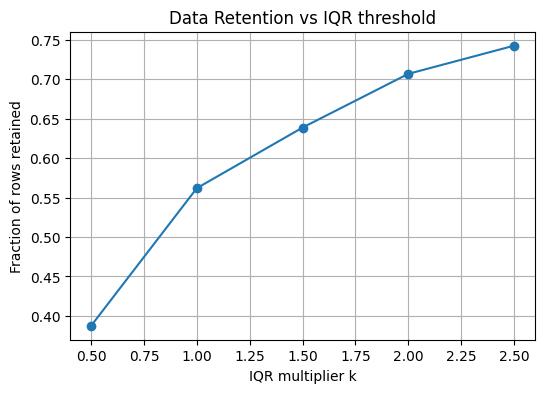

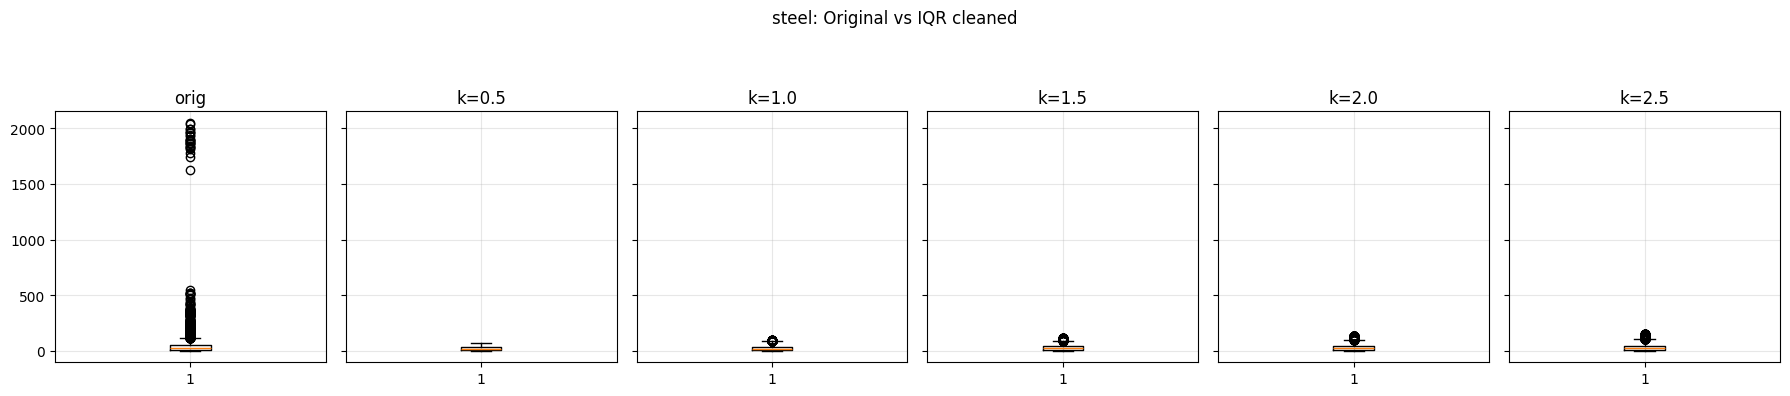

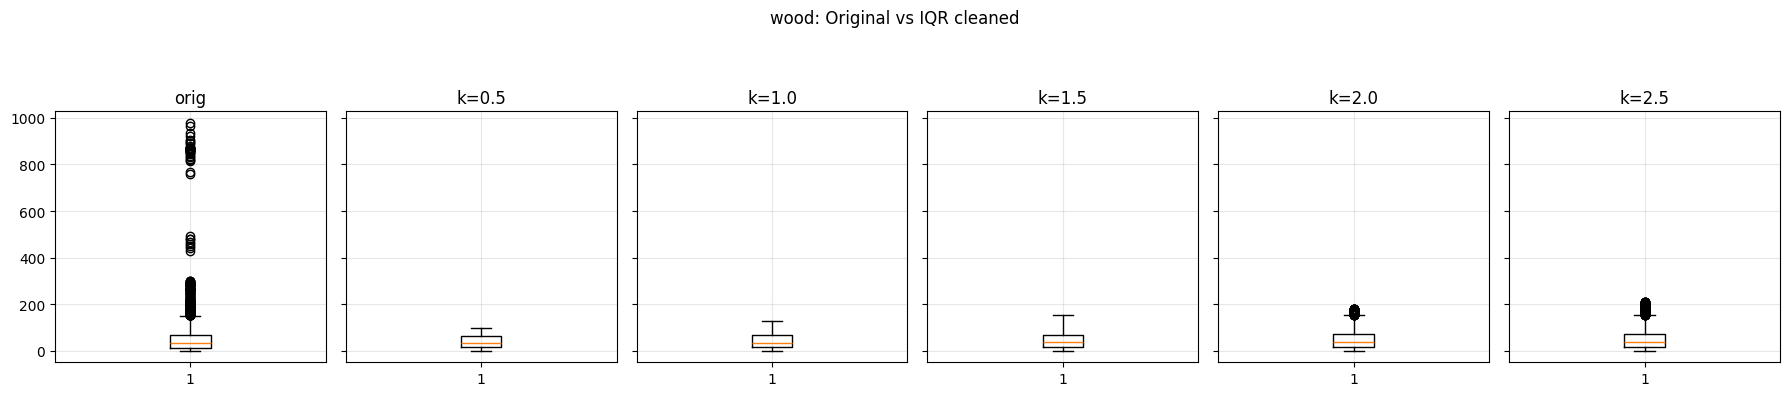

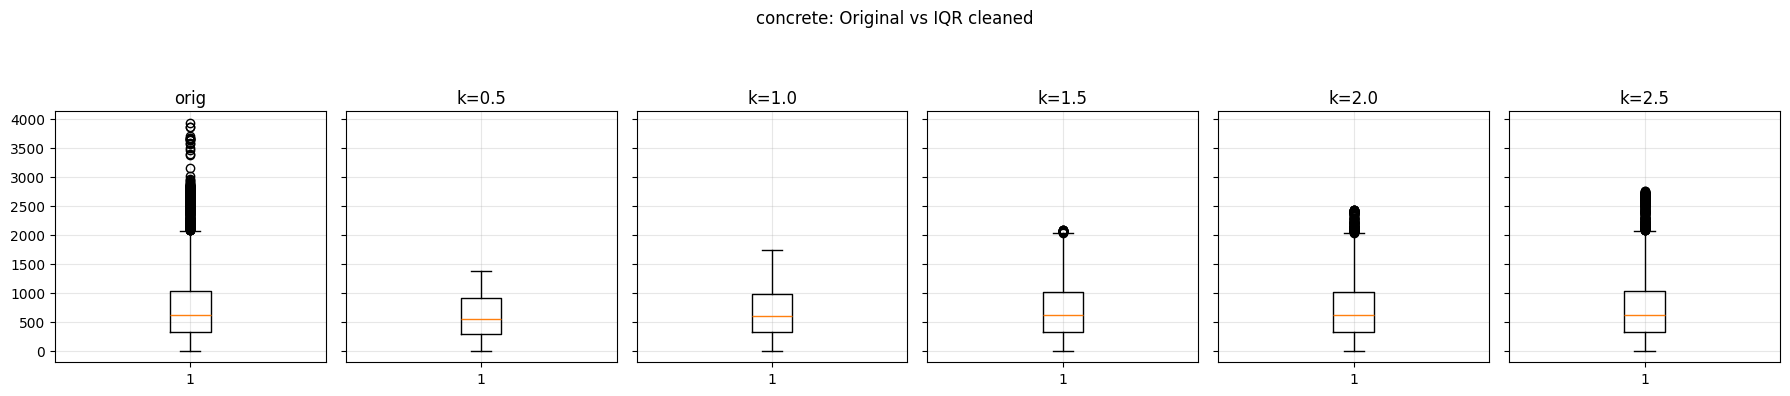

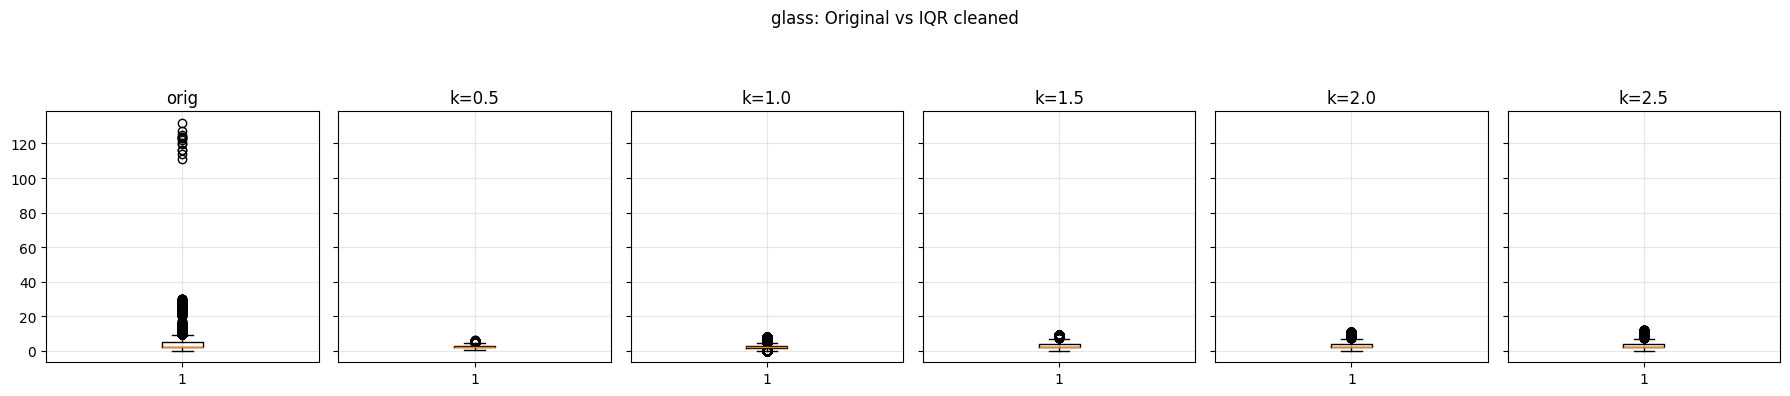

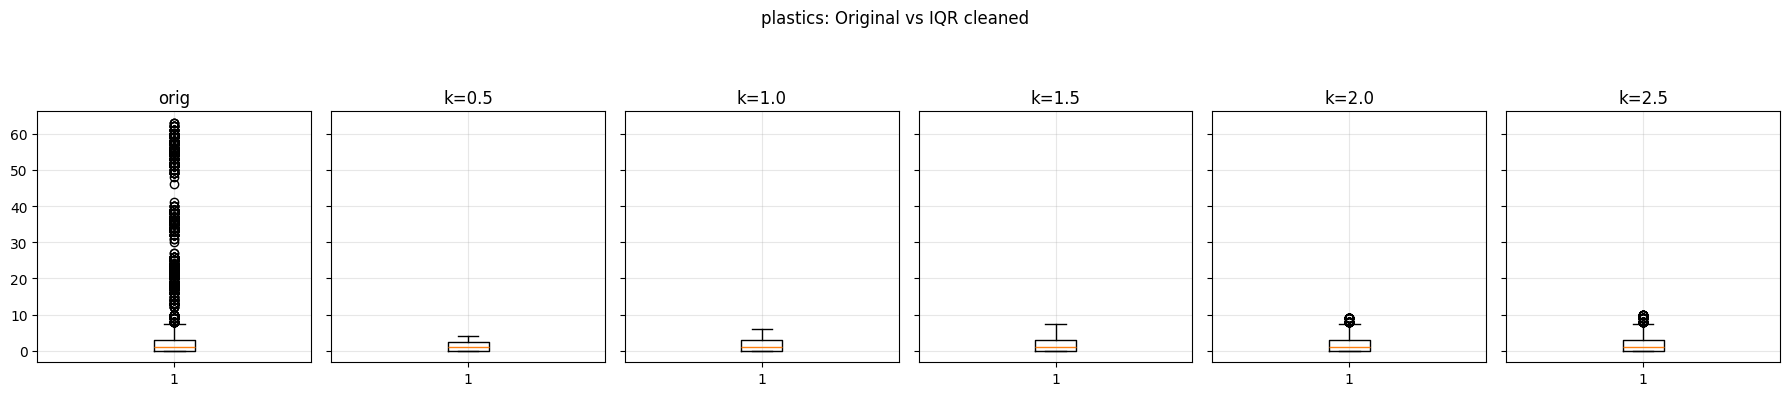

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1) Load your original df (before any cleaning) ---
file_path = '/content/drive/MyDrive/ProjectManagement/buildings_10000.xlsx'
df = pd.read_excel(
    file_path,
    na_values=["NA", "unspecified", "Unspecified"]
)
df = df.loc[:, ~df.columns.str.lower().str.contains("unnamed")]

# define your targets
feature_cols = ['country','no_floors','occupation','urban_rural']
target_cols  = [c for c in df.columns if c not in feature_cols]

# --- 2) Define a clean-by-IQR function ---
def clean_by_iqr(df, targets, k):
    dfc = df.copy()
    for col in targets:
        q1 = dfc[col].quantile(0.25)
        q3 = dfc[col].quantile(0.75)
        iqr= q3 - q1
        low, high = q1 - k*iqr, q3 + k*iqr
        dfc = dfc[(dfc[col] >= low) & (dfc[col] <= high)]
    return dfc

# --- 3) Try several k values ---
ks = [0.5, 1.0, 1.5, 2.0, 2.5]
retained_frac = []
cleaned_dfs   = []

for k in ks:
    dfc = clean_by_iqr(df, target_cols, k)
    retained_frac.append(len(dfc) / len(df))
    cleaned_dfs.append(dfc)

# --- 4) Plot % retained vs k ---
plt.figure(figsize=(6,4))
plt.plot(ks, retained_frac, marker='o')
plt.xlabel('IQR multiplier k')
plt.ylabel('Fraction of rows retained')
plt.title('Data Retention vs IQR threshold')
plt.grid(True)
plt.show()

# --- 5) Boxplots: Original vs cleaned at each k, for each target ---
for col in target_cols:
    n = len(ks) + 1
    fig, axes = plt.subplots(1, n, figsize=(3*n, 4), sharey=True)
    # original
    axes[0].boxplot(df[col].dropna().astype(float))
    axes[0].set_title('orig')
    # cleaned
    for i, k in enumerate(ks):
        axes[i+1].boxplot(cleaned_dfs[i][col].dropna().astype(float))
        axes[i+1].set_title(f'k={k}')
    fig.suptitle(f'{col}: Original vs IQR cleaned')
    for ax in axes:
        ax.grid(alpha=0.3)
    plt.tight_layout(rect=[0,0,1,0.90])
    plt.show()
